In [1]:
import warnings 
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd

from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train_case2.csv', ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
cat_columns = ['cholesterol', 'gluc']

for col in cat_columns:
    df[col] = df[col].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           70000 non-null  int64   
 1   age          70000 non-null  int64   
 2   gender       70000 non-null  int64   
 3   height       70000 non-null  int64   
 4   weight       70000 non-null  float64 
 5   ap_hi        70000 non-null  int64   
 6   ap_lo        70000 non-null  int64   
 7   cholesterol  70000 non-null  category
 8   gluc         70000 non-null  category
 9   smoke        70000 non-null  int64   
 10  alco         70000 non-null  int64   
 11  active       70000 non-null  int64   
 12  cardio       70000 non-null  int64   
dtypes: category(2), float64(1), int64(10)
memory usage: 6.0 MB


In [7]:
features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

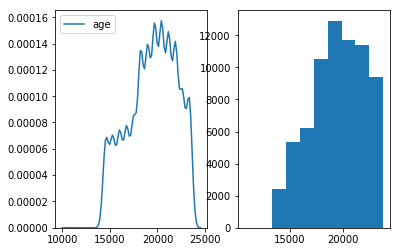

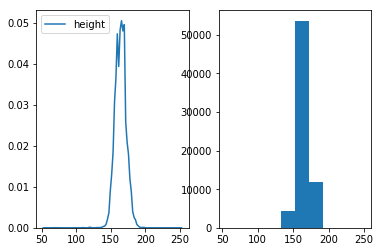

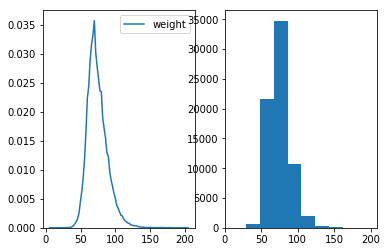

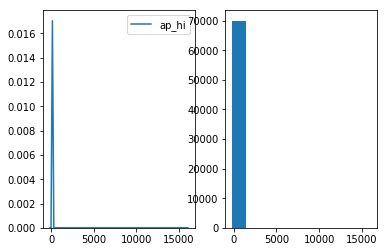

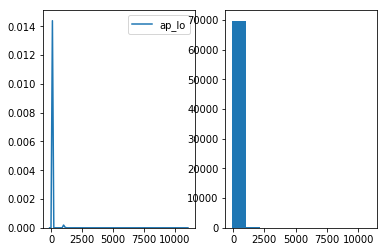

In [8]:
for name in features:
  plt.subplot(1,2,1)
  sns.kdeplot(df[name])
  plt.subplot(1,2,2)
  plt.hist(df[name])
  plt.show()

In [9]:
df.loc[(df['ap_hi']>300) & (df['ap_hi']<3000)].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1876,2654,15116,1,160,60.0,902,60,1,1,0,0,1,0
2014,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0
4817,6822,14425,1,168,63.0,909,60,2,1,0,0,1,0
8915,12710,18870,1,164,75.0,1420,80,2,1,0,0,1,1
9557,13616,22659,1,155,87.0,701,110,1,1,0,0,1,1


In [10]:
df.loc[(df['ap_hi']>300) & (df['ap_hi']<3000), 'ap_hi'] = df.loc[(df['ap_hi']>300) & (df['ap_hi']<3000), 'ap_hi'] // 10

In [11]:
df.loc[df['ap_hi']>=3000]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1
25519,36414,21361,1,169,71.0,14020,80,3,3,0,0,1,1
40852,58374,17438,1,169,70.0,16020,80,1,1,0,0,0,1
46912,66998,16910,2,180,78.0,14020,90,1,1,0,0,1,1
47253,67502,19731,1,160,65.0,14020,90,1,1,0,0,1,0
51438,73356,18784,2,168,65.0,11020,80,1,1,0,0,1,1
55459,79116,18307,1,152,76.0,13010,80,2,2,0,0,1,1
55847,79679,23182,1,161,105.0,13010,80,1,1,0,0,0,0


In [12]:
df.loc[df['ap_hi']>=3000, 'ap_hi'] = df.loc[df['ap_hi']>=3000, 'ap_hi'] // 100

In [13]:
df.loc[df['ap_hi']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,6525,15281,1,165,78.0,-100,80,2,1,0,0,1,0
16021,22881,22108,2,161,90.0,-115,70,1,1,0,0,1,0
20536,29313,15581,1,153,54.0,-100,70,1,1,0,0,1,0
23988,34295,18301,1,162,74.0,-140,90,1,1,0,0,1,1
25240,36025,14711,2,168,50.0,-120,80,2,1,0,0,0,1
35040,50055,23325,2,168,59.0,-150,80,1,1,0,0,1,1
46627,66571,23646,2,160,59.0,-120,80,1,1,0,0,0,0


In [14]:
df.loc[df['ap_hi']<0, 'ap_hi'] = df.loc[df['ap_hi']<0, 'ap_hi'] * -1

In [15]:
df.loc[df['ap_hi']<50]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
567,815,21281,1,168,78.0,14,90,2,1,0,0,1,1
927,1294,21867,2,175,70.0,14,90,3,1,0,0,1,1
979,1360,18225,1,172,65.0,11,80,1,3,0,0,1,0
1600,2260,19201,1,165,66.0,12,80,1,1,0,0,1,0
1627,2301,22591,1,165,71.0,14,80,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68630,98039,21217,1,160,59.0,12,80,1,1,0,0,1,0
68742,98213,18755,1,158,74.0,14,90,1,1,0,0,1,1
68998,98568,19107,1,154,77.0,14,90,1,1,0,0,1,0
69137,98743,15442,2,176,65.0,12,80,1,1,0,0,1,0


In [16]:
df.loc[df['ap_hi']<50, 'ap_hi'] = df.loc[df['ap_hi']<50, 'ap_hi'] * 10

In [17]:
df.loc[(df['ap_hi']<50) | (df['ap_hi']>250)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
8757,12494,16905,2,163,63.0,10,2088,1,1,1,0,1,0
40330,57646,20322,1,162,50.0,300,0,1,1,0,0,1,0
40831,58349,19806,1,162,67.0,400,80,1,3,0,0,1,1
42334,60477,18716,1,171,80.0,10,1088,1,1,0,0,1,1


In [18]:
df.iloc[8757, 5] = 120
df.iloc[8757, 6] = 80
df.iloc[42334, 5] = 110
df.iloc[42334, 6] = 80
df.iloc[8757]

id             12494.0
age            16905.0
gender             2.0
height           163.0
weight            63.0
ap_hi            120.0
ap_lo             80.0
cholesterol        1.0
gluc               1.0
smoke              1.0
alco               0.0
active             1.0
cardio             0.0
Name: 8757, dtype: float64

In [19]:
df.iloc[40330, 5] = 130
df.iloc[40330, 6] = 80
df.iloc[40831, 5] = 140

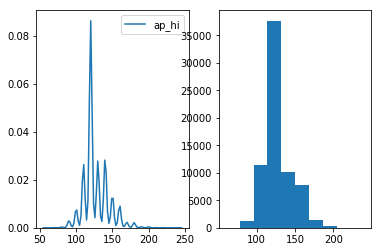

In [20]:
plt.subplot(1,2,1)
sns.kdeplot(df['ap_hi'])
plt.subplot(1,2,2)
plt.hist(df['ap_hi'])
plt.show()

In [21]:
df.loc[(df['ap_lo']>200) & (df['ap_lo']<2000)].head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1


In [22]:
df.loc[(df['ap_lo']>200) & (df['ap_lo']<2000), 'ap_lo'] = df.loc[(df['ap_lo']>200) & (df['ap_lo']<2000), 'ap_lo'] // 10

In [23]:
df.loc[df['ap_lo']>=2000]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2381,3352,20994,2,186,105.0,140,10000,1,1,0,0,1,1
2985,4208,20398,1,168,78.0,140,8044,3,3,0,0,0,1
6653,9482,19528,1,162,69.0,130,9100,1,1,0,0,1,1
9165,13066,19078,1,165,71.0,120,8000,1,1,0,0,1,1
12086,17260,21466,2,169,78.0,130,9011,1,1,1,1,1,1
14308,20438,18381,1,160,70.0,160,7100,1,1,0,1,1,1
15990,22832,14508,2,179,70.0,120,8500,1,1,0,0,1,0
17738,25348,19573,1,151,57.0,140,8099,1,1,0,0,0,0
20882,29821,19121,1,155,81.0,160,8100,1,1,0,0,1,1
23230,33191,19932,2,170,70.0,112,5700,1,2,0,0,1,1


In [24]:
df.loc[df['ap_lo']>=2000, 'ap_lo'] = df.loc[df['ap_lo']>=2000, 'ap_lo'] // 100

In [25]:
df.loc[df['ap_lo']>=df['ap_hi']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
474,681,19099,1,156,65.0,120,150,2,1,0,0,1,0
636,913,20457,2,169,68.0,70,110,1,1,0,0,1,0
2384,3356,23361,1,154,102.0,90,150,1,1,0,0,0,1
2990,4214,21957,2,182,90.0,80,140,3,3,0,0,1,1
3447,4880,19992,2,180,80.0,80,125,3,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66315,94673,22551,1,169,88.0,100,160,3,3,0,0,0,1
66657,95164,19498,2,160,81.0,80,120,3,3,1,1,1,1
67421,96271,23424,1,153,74.0,80,130,1,1,0,0,1,1
67470,96339,21193,2,172,57.0,80,120,1,1,1,0,1,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           70000 non-null  int64   
 1   age          70000 non-null  int64   
 2   gender       70000 non-null  int64   
 3   height       70000 non-null  int64   
 4   weight       70000 non-null  float64 
 5   ap_hi        70000 non-null  int64   
 6   ap_lo        70000 non-null  int64   
 7   cholesterol  70000 non-null  category
 8   gluc         70000 non-null  category
 9   smoke        70000 non-null  int64   
 10  alco         70000 non-null  int64   
 11  active       70000 non-null  int64   
 12  cardio       70000 non-null  int64   
dtypes: category(2), float64(1), int64(10)
memory usage: 6.0 MB


In [27]:
indexes = df.loc[df['ap_lo']>=df['ap_hi']].index

for ind in indexes:
    _ = df.iloc[ind, 5]
    df.iloc[ind, 5] = df.iloc[ind, 6]
    df.iloc[ind, 6] = _

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           70000 non-null  int64   
 1   age          70000 non-null  int64   
 2   gender       70000 non-null  int64   
 3   height       70000 non-null  int64   
 4   weight       70000 non-null  float64 
 5   ap_hi        70000 non-null  int64   
 6   ap_lo        70000 non-null  int64   
 7   cholesterol  70000 non-null  category
 8   gluc         70000 non-null  category
 9   smoke        70000 non-null  int64   
 10  alco         70000 non-null  int64   
 11  active       70000 non-null  int64   
 12  cardio       70000 non-null  int64   
dtypes: category(2), float64(1), int64(10)
memory usage: 6.0 MB


In [28]:
df.loc[df['ap_lo']<0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60106,85816,22571,1,167,74.0,150,-70,1,1,0,0,1,1


In [29]:
df.loc[df['ap_lo']<0, 'ap_lo'] = df.loc[df['ap_lo']<0, 'ap_lo'] * -1

In [30]:
df.loc[df['ap_lo']<=10, 'ap_lo'] = df.loc[df['ap_lo']<=10, 'ap_lo'] * 10

In [31]:
df.loc[df['ap_lo']==0, 'ap_lo'] = df['ap_lo'].mode()[0]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           70000 non-null  int64   
 1   age          70000 non-null  int64   
 2   gender       70000 non-null  int64   
 3   height       70000 non-null  int64   
 4   weight       70000 non-null  float64 
 5   ap_hi        70000 non-null  int64   
 6   ap_lo        70000 non-null  int64   
 7   cholesterol  70000 non-null  category
 8   gluc         70000 non-null  category
 9   smoke        70000 non-null  int64   
 10  alco         70000 non-null  int64   
 11  active       70000 non-null  int64   
 12  cardio       70000 non-null  int64   
dtypes: category(2), float64(1), int64(10)
memory usage: 6.0 MB


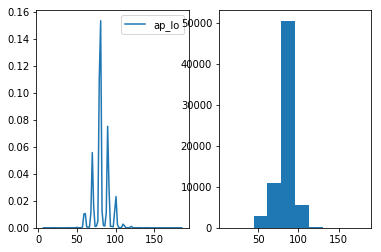

In [33]:
plt.subplot(1,2,1)
sns.kdeplot(df['ap_lo'])
plt.subplot(1,2,2)
plt.hist(df['ap_lo'])
plt.show()

In [34]:
df.loc[df['ap_lo']>df['ap_hi']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


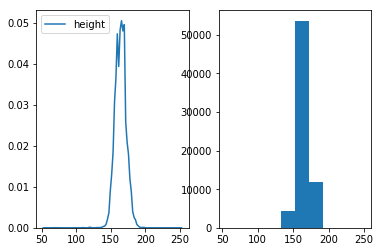

In [35]:
plt.subplot(1,2,1)
sns.kdeplot(df['height'])
plt.subplot(1,2,2)
plt.hist(df['height'])
plt.show()

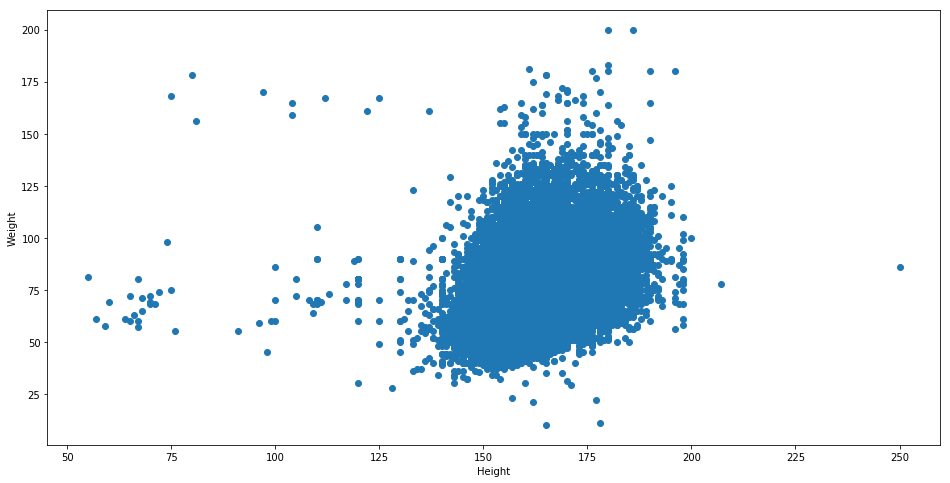

In [36]:
plt.figure(figsize=(16, 8))

plt.scatter(df.height, df.weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [37]:
df.loc[df['height'] > 210, 'height'] = df.loc[df['height'] > 210, 'height'] - 100
df.loc[df['height'] < 100, 'height'] = df.loc[df['height'] < 100, 'height'] + 100

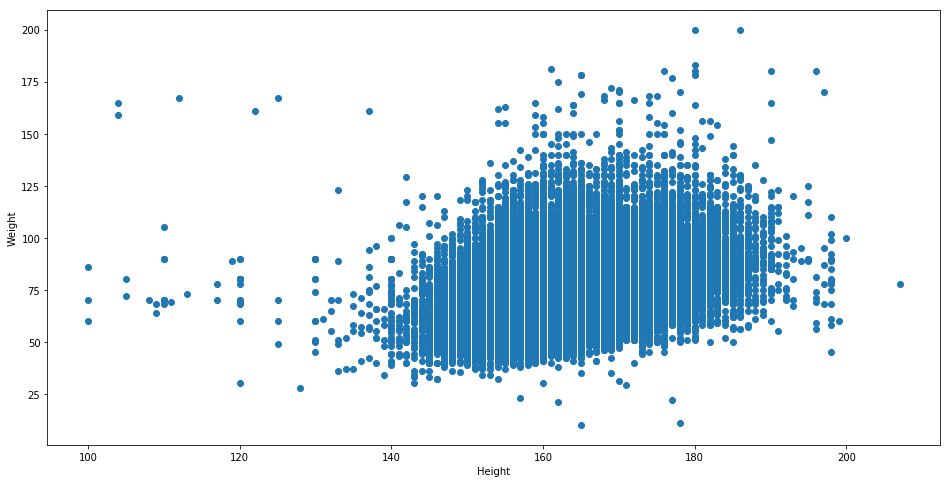

In [38]:
plt.figure(figsize=(16, 8))

plt.scatter(df.height, df.weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [39]:
df.loc[df['age'] < 12000]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6219,8850,10878,1,175,59.0,120,80,1,1,0,0,1,0
22343,31922,10798,2,175,92.0,100,60,1,1,0,0,1,0
30666,43842,10859,1,159,59.0,120,80,1,1,0,0,1,0
55905,79749,10964,1,160,59.0,110,70,1,1,0,0,1,0


In [40]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [41]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.399229,74.205690,127.067100,81.570357,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,7.993305,14.395757,17.055356,9.799535,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,100.000000,10.000000,60.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,207.000000,200.000000,240.000000,182.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df['bmi'] = df['weight'] / (df['height'] / 100 ) ** 2
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


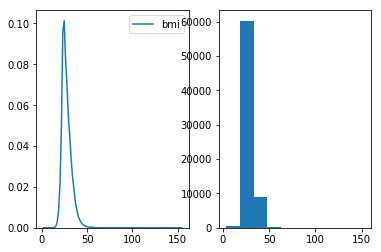

In [43]:
plt.subplot(1,2,1)
sns.kdeplot(df['bmi'])
plt.subplot(1,2,2)
plt.hist(df['bmi'])
plt.show()

In [44]:
df.loc[df['bmi'] > 80]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
6153,8757,20990,1,122,161.0,120,80,1,1,0,0,1,1,108.169847
12435,17757,22077,1,137,161.0,150,100,2,1,0,0,0,1,85.779743
15366,21958,17405,1,125,167.0,180,90,1,2,0,0,1,1,106.880000
17074,24396,21259,1,100,86.0,110,70,1,1,0,0,1,1,86.000000
20028,28605,19777,1,112,167.0,180,120,1,1,0,1,1,0,133.131378
28897,41289,18961,1,110,105.0,140,90,2,1,0,0,1,1,86.776860
45358,64802,19834,1,104,159.0,200,100,3,1,0,0,0,1,147.004438
59625,85128,17643,1,104,165.0,120,80,1,1,0,0,1,0,152.551775


In [45]:
df['ap_mean'] = (df['ap_hi'] + df['ap_lo']) / 2
df['ap_dif'] = df['ap_hi'] - df['ap_lo']

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,ap_mean,ap_dif
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.399229,74.205690,127.067100,81.570357,0.088129,0.053771,0.803729,0.499700,27.503683,104.318729,45.496743
std,28851.302323,2467.251667,0.476838,7.993305,14.395757,17.055356,9.799535,0.283484,0.225568,0.397179,0.500003,5.379276,12.582655,11.854924
min,0.000000,10798.000000,1.000000,100.000000,10.000000,60.000000,10.000000,0.000000,0.000000,0.000000,0.000000,3.471784,42.500000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,23.875115,100.000000,40.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,26.370238,100.000000,40.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,30.189591,110.000000,50.000000
max,99999.000000,23713.000000,2.000000,207.000000,200.000000,240.000000,182.000000,1.000000,1.000000,1.000000,1.000000,152.551775,190.000000,220.000000


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
continuos_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'ap_mean', 'ap_dif']

scalers = {}

for col in continuos_cols:
    _scaler = StandardScaler()
    _scaler.fit(df[col].values.reshape(-1, 1))
    df[col] = _scaler.transform(df[col].values.reshape(-1, 1))
    scalers[col] = _scaler

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,ap_mean,ap_dif
count,70000.000000,7.000000e+04,70000.000000,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,7.000000e+04,7.000000e+04,7.000000e+04
mean,49972.419900,5.202481e-16,1.349571,-9.429648e-16,-3.450534e-16,8.764473e-16,1.099153e-16,0.088129,0.053771,0.803729,0.499700,-2.589865e-16,5.720575e-16,-8.691508e-16
std,28851.302323,1.000007e+00,0.476838,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.283484,0.225568,0.397179,0.500003,1.000007e+00,1.000007e+00,1.000007e+00
min,0.000000,-3.514407e+00,1.000000,-8.056703e+00,-4.460075e+00,-3.932347e+00,-7.303497e+00,0.000000,0.000000,0.000000,0.000000,-4.467529e+00,-4.913047e+00,-3.837820e+00
25%,25006.750000,-7.315341e-01,1.000000,-6.754737e-01,-6.394770e-01,-4.143655e-01,-1.602493e-01,0.000000,0.000000,1.000000,0.000000,-6.745508e-01,-3.432312e-01,-4.636708e-01
50%,50001.500000,9.489744e-02,1.000000,7.515986e-02,-1.532192e-01,-4.143655e-01,-1.602493e-01,0.000000,0.000000,1.000000,0.000000,-2.107074e-01,-3.432312e-01,-4.636708e-01
75%,74889.250000,7.531244e-01,2.000000,7.006878e-01,5.414349e-01,7.582951e-01,8.602146e-01,0.000000,0.000000,1.000000,1.000000,4.993101e-01,4.515193e-01,3.798666e-01
max,99999.000000,1.720199e+00,2.000000,5.329594e+00,8.738353e+00,6.621598e+00,1.024848e+01,1.000000,1.000000,1.000000,1.000000,2.324644e+01,6.809523e+00,1.472000e+01


In [48]:
df = pd.get_dummies(df)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,ap_mean,ap_dif,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,0,-0.436062,2,0.450477,-0.847873,-1.000696,-0.160249,0,0,1,0,-1.029247,-0.740606,-1.307208,1,0,0,1,0,0
1,1,0.307686,1,-1.050790,0.749831,0.758295,0.860215,0,0,1,1,1.380121,0.848895,0.379867,0,0,1,1,0,0
2,2,-0.247997,1,0.075160,-0.708942,0.171965,-1.180713,0,0,0,1,-0.742834,-0.343231,1.223404,0,0,1,1,0,0
3,3,-0.748152,2,0.575582,0.541435,1.344625,1.880679,0,0,1,1,0.224343,1.643645,0.379867,1,0,0,1,0,0
4,4,-0.808543,1,-1.050790,-1.264666,-1.587026,-2.201177,0,0,0,0,-0.835157,-1.932732,-0.463671,1,0,0,1,0,0


In [49]:
cat_features = ['gender', 'smoke', 'alco', 'active', 'cholesterol_1', 'cholesterol_2', 'cholesterol_3', 'gluc_1', 'gluc_2', 'gluc_3']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('cardio', 1), df['cardio'], random_state=42)

In [51]:
X_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,bmi,ap_mean,ap_dif,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
58774,83880,0.088412,1,0.450477,0.055177,-0.414365,-0.160249,0,0,1,-0.172990,-0.343231,-0.463671,1,0,0,1,0,0
7414,10567,0.459273,1,0.200265,-0.847873,0.171965,-0.160249,0,0,1,-0.930252,0.054144,0.379867,1,0,0,1,0,0
63662,90896,1.567802,1,-1.050790,1.791812,-1.000696,-1.180713,0,0,1,2.525954,-1.137982,-0.463671,1,0,0,1,0,0
54551,77824,-1.943823,1,0.075160,-0.986804,-1.000696,-1.180713,0,0,1,-1.015965,-1.137982,-0.463671,1,0,0,1,0,0
50995,72750,-0.494021,1,-0.175051,-1.264666,-2.173356,-2.201177,0,0,1,-1.194684,-2.330107,-1.307208,0,1,0,1,0,0


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [53]:
ml_alg = {'logreg': LogisticRegression(class_weight='balanced', 
                                       random_state=42), 
          'Forest': RandomForestClassifier(n_estimators=200, 
                                           max_depth=6, 
                                           random_state=42), 
          'catboost': CatBoostClassifier(iterations=200,
                                         learning_rate=0.1,
                                         cat_features=cat_features,
                                         verbose = False,
                                         custom_metric = ['Logloss', 'AUC'])}

In [54]:
for key in ml_alg.keys():
    cv_scores = cross_val_score(ml_alg[key], X_train, y_train, cv=8, scoring='roc_auc')
    cv_score = np.mean(cv_scores)
    print('CV score is {}'.format(cv_score))

CV score is 0.7479339533305429
CV score is 0.7990385103358297
CV score is 0.8027735191494039


In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
params = {'logreg': {
            'C': [0.1, 0.5, 1, 3, 5]
          },
          'Forest': {
              'n_estimators': [200, 500, 1000],
              'max_depth': [5, 7, 9]
          },
          'catboost': {
              'iterations': [200, 500, 800],
              'learning_rate': [0.005, 0.012, 0.03]
          }
}

ml_alg = {'logreg': LogisticRegression(), 
          'Forest': RandomForestClassifier(), 
          'catboost': CatBoostClassifier(cat_features=cat_features, verbose=False, custom_metric = ['Logloss', 'AUC'])}

results_CV = []

for key in ml_alg.keys():
    classifier = ml_alg[key]
    clf = GridSearchCV(classifier, params[key], n_jobs=-1, cv=5, scoring='roc_auc', verbose=2)
    clf.fit(X_train, y_train)
    best_params = clf.best_params_
    best_score = clf.best_score_
    name = key
    
    results_CV.append([name, best_params, best_score])
    
results_CV = pd.DataFrame(results_CV, columns=['Algorithm', 'params', 'score'])
results_CV

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed:    3.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.7s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.7min finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.5min finished


,Algorithm,params,score
0,logreg,{'C': 0.1},0.727733
1,Forest,"{'max_depth': 9, 'n_estimators': 500}",0.801527
2,catboost,"{'iterations': 800, 'learning_rate': 0.012}",0.803163


In [57]:
ml_alg = {'logreg': LogisticRegression(**results_CV.iloc[0]['params']), 
          'Forest': RandomForestClassifier(**results_CV.iloc[1]['params']), 
          'catboost': CatBoostClassifier(**results_CV.iloc[2]['params'],
                                         cat_features=cat_features, 
                                         verbose=False, 
                                         custom_metric = ['Logloss', 'AUC'])}
results = []

for key in ml_alg.keys():
    
    _clf = ml_alg[key]
    _clf.fit(X_train, y_train)

    preds = _clf.predict_proba(X_test)[:, 1]
    
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    fscore = (2 * precision * recall) / (precision + recall)
    
    ix = np.argmax(fscore)
    
    roc_auc = roc_auc_score(y_test, preds)
    
    name = key
    
    results.append([name, preds, roc_auc, precision[ix], recall[ix], fscore[ix], thresholds[ix]])
    
results = pd.DataFrame(results, columns=['Algorithm', 'preds', 'roc_auc', 'precision', 'recall', 'f_score', 'thresholds'])
results

,Algorithm,preds,roc_auc,precision,recall,f_score,thresholds
0,logreg,"[0.7765628999884068, 0.9089211476372715, 0.736...",0.790655,0.680387,0.806627,0.738148,0.403649
1,Forest,"[0.8208413312853212, 0.8590935658182172, 0.626...",0.802650,0.706856,0.789719,0.745993,0.394463
2,catboost,"[0.8230569101984316, 0.8496716378181495, 0.645...",0.803821,0.686906,0.820359,0.747724,0.369766


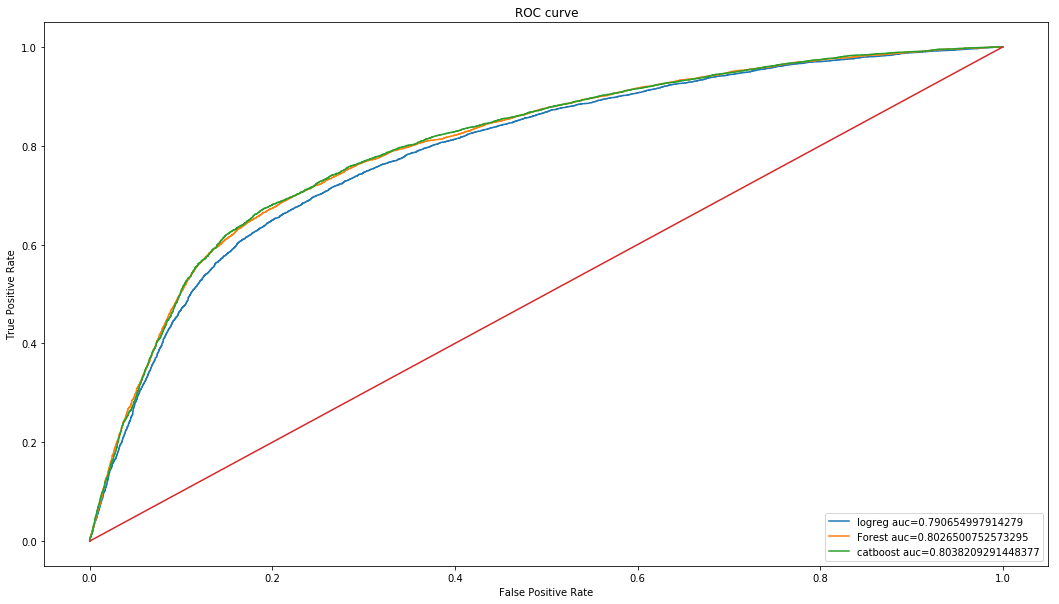

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(18,10))

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test,  results.iloc[i]['preds'])
    auc = roc_auc_score(y_test, results.iloc[i]['preds'])
    plt.plot(fpr, tpr, label = f"{results.iloc[i]['Algorithm']} auc={auc}")

plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')             
plt.legend(loc=4)
plt.show()

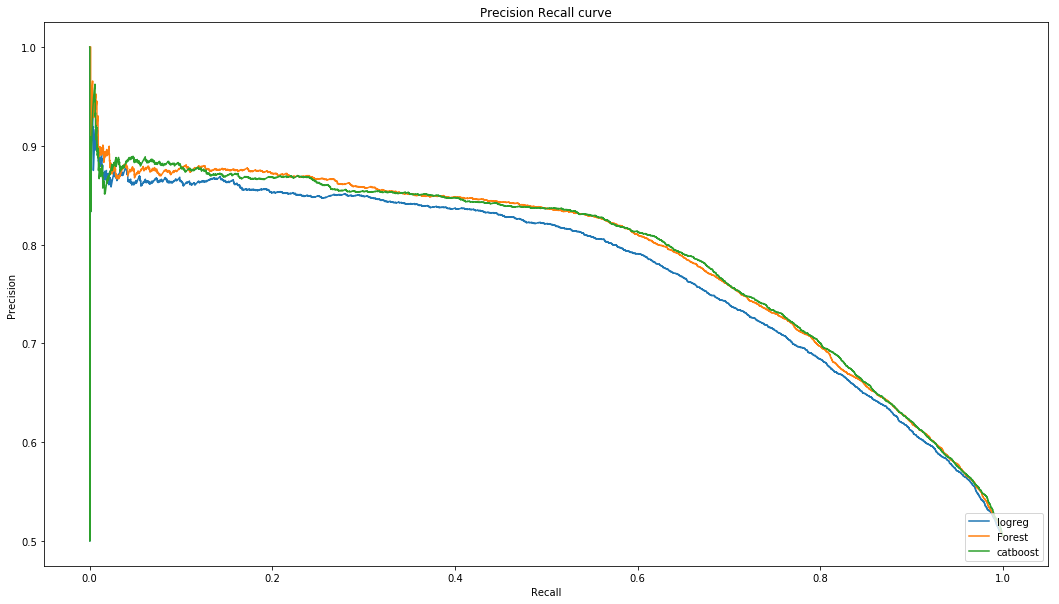

In [59]:
plt.figure(figsize=(18,10))

for i in range(3):
    precision, recall, thresholds = precision_recall_curve(y_test, results.iloc[i]['preds'])
    plt.plot(recall, precision, label = f"{results.iloc[i]['Algorithm']}")
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.legend(loc=4)
plt.show()

### На мой взгляд лучше всего с задачей справился catboost, хотя и RandomForest показал достойный результат ###

In [60]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5393 3295]
 [1584 7228]]


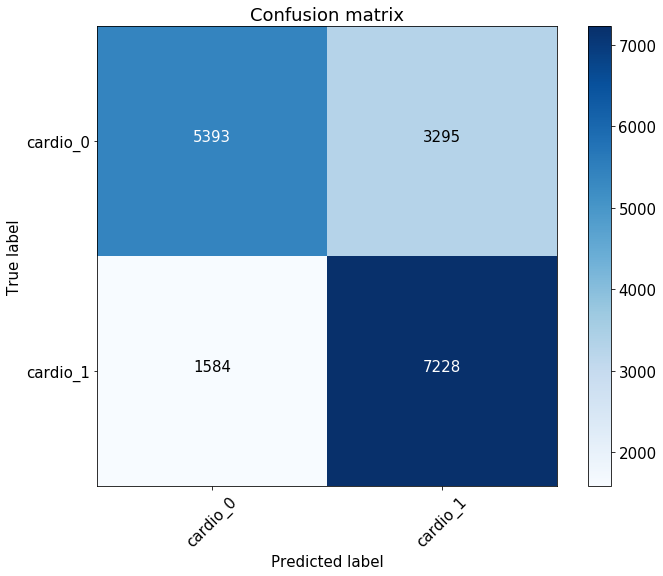

In [61]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, results.iloc[2]['preds']>results.iloc[2]['thresholds'])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['cardio_0', 'cardio_1'],
                      title='Confusion matrix')
plt.show()